# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration: Gain Insight From Data </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents
---

# Data Inspection and Analysis

## 1. Basic Information
- [v] **[Rows and Columns]():**
  - How many rows and columns are there in your data?

- [v] **[Meaning of Each Row/Column]():**
  - What is the meaning of each row/column?

- [v] **[Datatypes]():**
  - What is the datatype of each column?
  - List all features with suitable types.
  - List features with unsuitable types.
  
## 2. Data Quality Check
- [v] **[Duplicated Rows]():**
  - Are there any duplicated rows?
  - Show how many.
  - Calculate the rate of duplicate rows.

- [v] **[Missing Values]():**
  - Are there any missing values?
  - Show how many missing values in each column.
  - Show the missing rate.

## 3. Data Distribution Analysis
### Numerical Data
- [v] **[Descriptive Statistics]():**
  - Find min, max, median, mode, std.
  - Make a conclusion on skewness.

### Categorical Data
- [v] **[Distribution Analysis]():**
  - Analyze the distribution of categorical data.
  
### [Abnormal data and Outliers]():
  - Use box plot to find outliers.
  - Comment on the abnormality of outliers.

## 4. Correlation Analysis
- [v] **[Correlation Visualization]():**
  - Use a heatmap or another suitable method to visualize the correlation between each feature.

## 5. Final Conclusion and Comments
- [v] **[Comments]():**
  - Provide clear and concise comments on each result.
---

## 0. Import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Define constants
Go to [(1) Reading the raw data](#reading-the-raw-data) <br>
Go to [(2) Count the number of missing values per column](#count-the-number-of-missing-values-per-column) <br>

In [2]:
RAW_FILE_PATH = '../data/raw.csv'   # path to raw data .csv file (1)
COL_MISSING_DROP_RATE = 0.33        # to drop columns having many missing values (2)

## 1. Basic Information


### 1.1 Context of the data
| Location          | Value                               |
|-----------|-------------------------------------|
| Latitude  | 10.7764                             |
| Longitude | 106.701                             |
| Address   | Quan 1, Ho Chi Minh, Viet Nam, Asia |
| Timezone  | Asia/Ho Chi Minh city               |
|Date start | 27/9/2009                          |
|Date end   | 5/6/2023                          |
 
### 1.2 The meaning of each column

| Column           | Meaning                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `datetime`       | ISO 8601 formatted date, time or datetime value indicating the date and time of the weather data in the local time zone of the requested location. See Dates and Times in the Weather API for more information.                                                                                                                                                                                                                         |
| `datetimeEpoch`  | Number of seconds since 1st January 1970 in UTC time.                                                                                                                                                                                                                                                                                                                                                                                   |
| `tempmax`        | Maximum temperature at the location (&deg;F).                                                                                                                                                                                                                                                                                                                                                                                           |
| `tempmin`        | Minimum temperature at the location (&deg;F).                                                                                                                                                                                                                                                                                                                                                                                           |
| `temp`           | Average temperature at the location in day (&deg;F).                                                                                                                                                                                                                                                                                                                                                                                    |
| `feelslikemax`   | Maximum feels like temperature at the location.                                                                                                                                                                                                                                                                                                                                                                                         |
| `feelslikemin`   | Minimum feels like temperature at the location.                                                                                                                                                                                                                                                                                                                                                                                         |
| `feelslike`      | What the temperature feels like accounting for heat index or wind chill. Daily values are average values (mean) for the day.                                                                                                                                                                                                                                                                                                            |
| `dew`            | Dew point temperature                                                                                                                                                                                                                                                                                                                                                                                                                   |
| `humidity`       | Relative humidity in \%                                                                                                                                                                                                                                                                                                                                                                                                                 |
| `precip`         | The amount of liquid precipitation that fell or is predicted to fall in the period. This includes the liquid-equivalent amount of any frozen precipitation such as snow or ice.                                                                                                                                                                                                                                                         |
| `precipprob`     | The likelihood of measurable precipitation ranging from 0 &deg;F to 100 &deg;F.                                                                                                                                                                                                                                                                                                                                                         |
| `precipcover`    | The proportion of hours where there was non-zero precipitation.                                                                                                                                                                                                                                                                                                                                                                         |
| `preciptype`     | An array indicating the type(s) of precipitation expected or that occurred. Possible values include rain, snow, freezingrain and ice.                                                                                                                                                                                                                                                                                                   |
| `snow`           | The amount of snow that fell or is predicted to fall.                                                                                                                                                                                                                                                                                                                                                                                   |
| `snowdepth`      | The depth of snow on the ground.                                                                                                                                                                                                                                                                                                                                                                                                        |
| `windgust`       | Instantaneous wind speed at a location – May be empty if it is not significantly higher than the wind speed. Daily values are the maximum hourly value for the day.                                                                                                                                                                                                                                                                     |
| `windspeed`      | The sustained wind speed measured as the average windspeed that occurs during the preceding one to two minutes. Daily values are the maximum hourly value for the day.                                                                                                                                                                                                                                                                  |
| `winddir`        | Direction from which the wind is blowing.                                                                                                                                                                                                                                                                                                                                                                                               |
| `pressure`       | The sea level atmospheric or barometric pressure in millibars (or hectopascals).                                                                                                                                                                                                                                                                                                                                                        |
| `cloudcover`     | How much of the sky is covered in cloud ranging from 0-100 \%.                                                                                                                                                                                                                                                                                                                                                                          |
| `visibility`     | Distance at which distant objects are visible.                                                                                                                                                                                                                                                                                                                                                                                          |
| `solarradiation` | $(\frac{W}{m^2})$ the solar radiation power at the instantaneous moment of the observation (or forecast prediction).                                                                                                                                                                                                                                                                                                                    |
| `solarenergy`    | $(\frac{MJ}{m^2})$ indicates the total energy from the sun that builds up over an hour or day.                                                                                                                                                                                                                                                                                                                                          |
| `uvindex`        | A value between 0 and 10 indicating the level of ultra violet (UV) exposure for that hour or day. 10 represents high level of exposure, and 0 represents no exposure. The UV index is calculated based on amount of short wave solar radiation which in turn is a level the cloudiness, type of cloud, time of day, time of year and location altitude. Daily values represent the maximum value of the hourly values                   |
| `sunrise`        | The formatted time of the sunrise (For example “2022-05-23T05:50:40”).                                                                                                                                                                                                                                                                                                                                                                  |
| `sunriseEpoch`   | Sunrise time specified as number of seconds since 1st January 1970 in UTC time                                                                                                                                                                                                                                                                                                                                                          |
| `sunset`         | The formatted time of the sunset (For example “2022-05-23T20:22:29”)                                                                                                                                                                                                                                                                                                                                                                    |
| `sunsetEpoch`    | Sunset time specified as number of seconds since 1st January 1970 in UTC time.                                                                                                                                                                                                                                                                                                                                                          |
| `moonphase`      | Represents the fractional portion through the current moon lunation cycle ranging from 0 (the new moon) to 0.5 (the full moon) and back to 1 (the next new moon).                                                                                                                                                                                                                                                                       |
| `conditions`     | Textual representation of the weather conditions.                                                                                                                                                                                                                                                                                                                                                                                       |
| `description`    | Longer text descriptions suitable for displaying in weather displays. The descriptions combine the main features of the weather for the day such as precipitation or amount of cloud cover. Daily descriptions are provided for historical and forecast days. When the timeline request includes the model forecast period, a seven day outlook description is provided at the root response level.                                     |
| `icon`           | A fixed, machine readable summary that can be used to display an icon.                                                                                                                                                                                                                                                                                                                                                                  |
| `stations`       | The weather stations used when collecting an historical observation record.                                                                                                                                                                                                                                                                                                                                                             |
| `source`         | The type of weather data used for this weather object. – Values include historical observation (“obs”), forecast (“fcst”), historical forecast (“histfcst”) or statistical forecast (“stats”). If multiple types are used in the same day, “comb” is used. Today a combination of historical observations and forecast data.                                                                                                            |
| `severerisk`     | A value between 0 and 100 representing the risk of convective storms (e.g. thunderstorms, hail and tornadoes). Severe risk is a scaled measure that combines a variety of other fields such as the convective available potential energy (CAPE) and convective inhibition (CIN), predicted rain and wind. Typically, a severe risk value less than 30 indicates a low risk, between 30 and 70 a moderate risk and above 70 a high risk. |

## 2. Specific information about the dataset

### 2.1 Rows and Columns

In [3]:
# Read raw data
raw_data = pd.read_csv(RAW_FILE_PATH)
print(f'This data has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

This data has 5000 rows and 36 columns


### 2.2 Column Datatype

In [183]:
# Checking datatype
raw_data.dtypes

datetime           object
datetimeEpoch       int64
tempmax           float64
tempmin           float64
temp              float64
feelslikemax      float64
feelslikemin      float64
feelslike         float64
dew               float64
humidity          float64
precip            float64
precipprob        float64
precipcover       float64
preciptype         object
snow              float64
snowdepth         float64
windgust          float64
windspeed         float64
winddir           float64
pressure          float64
cloudcover        float64
visibility        float64
solarradiation    float64
solarenergy       float64
uvindex           float64
sunrise            object
sunriseEpoch        int64
sunset             object
sunsetEpoch         int64
moonphase         float64
conditions         object
description        object
icon               object
stations           object
source             object
severerisk        float64
dtype: object

- There are:
    - `9` columns with `object` datatype.
    - `3` columns with `int64` datatype.
    - `24` columns with `float64` datatype.

#### Unsuitable datatype features: `datetime`, `sunrise` and `sunset`.
- `datetime` should be `datetime` datatype.
- `sunrise` and `sunset` should be represented as the number of seconds that have elapsed since midnight.

In [6]:
# Handle 'datetime' column from str -> datetime
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'], format="%Y-%m-%d")

# Handle 'sunrise' and 'sunset' columns from str -> int (seconds after midnight)
raw_data['sunrise'] = pd.to_timedelta(raw_data['sunrise']).dt.total_seconds()
raw_data['sunset'] = pd.to_timedelta(raw_data['sunset']).dt.total_seconds()

In [7]:
# check again
raw_data.dtypes

datetime          datetime64[ns]
datetimeEpoch              int64
tempmax                  float64
tempmin                  float64
temp                     float64
feelslikemax             float64
feelslikemin             float64
feelslike                float64
dew                      float64
humidity                 float64
precip                   float64
precipprob               float64
precipcover              float64
preciptype                object
snow                     float64
snowdepth                float64
windgust                 float64
windspeed                float64
winddir                  float64
pressure                 float64
cloudcover               float64
visibility               float64
solarradiation           float64
solarenergy              float64
uvindex                  float64
sunrise                  float64
sunriseEpoch               int64
sunset                   float64
sunsetEpoch                int64
moonphase                float64
conditions

## 3. Data Quality Check


### 3.1 Count duplicate rows

In [8]:
# Check for duplicate rows
duplicates_series = raw_data.duplicated()

print(f'The data has {sum(duplicates_series)} duplicate rows.')
if sum(duplicates_series) > 0:
    print(f'The duplicate rows are: {[i for i, d in enumerate(duplicates_series) if d == True]}')

The data has 0 duplicate rows.


### 3.2 Count the number of missing values per row
"`Empty values (or null values)` are used within the data set to `indicate an absence of data`, such as `missing` weather information or `unknown` data. They are `not used to indicate a zero value`. For example, an unknown precipitation value will be marked as empty or null. A zero amount of precipitation will be indicated by the value zero."

https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/

In [19]:
# Count the number of missing values in each row
missing_values_per_row = raw_data.isnull().sum(axis=1)

# Count the number of rows for each count of missing values
count_of_missing_values = missing_values_per_row.value_counts().sort_index()

# Dcount_of_missing_values
for missing_count, row_count in count_of_missing_values.items():
    print(f"The number of rows missing {missing_count} values: {row_count} rows ({round(row_count * 100.0 / raw_data.shape[0])}%).")

print(f'\nThe number of rows with missing data: {sum(count_of_missing_values[1:])} ({sum(count_of_missing_values[1:]) * 100.0 / raw_data.shape[0]})%')

The number of rows missing 0 values: 369 rows (7%).
The number of rows missing 1 values: 143 rows (3%).
The number of rows missing 3 values: 356 rows (7%).
The number of rows missing 4 values: 2611 rows (52%).
The number of rows missing 5 values: 1424 rows (28%).
The number of rows missing 6 values: 1 rows (0%).
The number of rows missing 9 values: 96 rows (2%).

The number of rows with missing data: 4631 (92.62)%


**Comment**: <br>
- Very few rows do not have any missing values `(7%)`.
- Most rows have `4` missing value `(52%)`.
- The most missing values in a row is `9`, a quarter of the total values that each row has.

### 3.3 Count the number of missing values per column

Column 'preciptype' is missing 37% of values.
Column 'snow'       is missing 90% of values.
Column 'snowdepth'  is missing 90% of values.
Column 'windgust'   is missing 79% of values.
Column 'severerisk' is missing 90% of values.


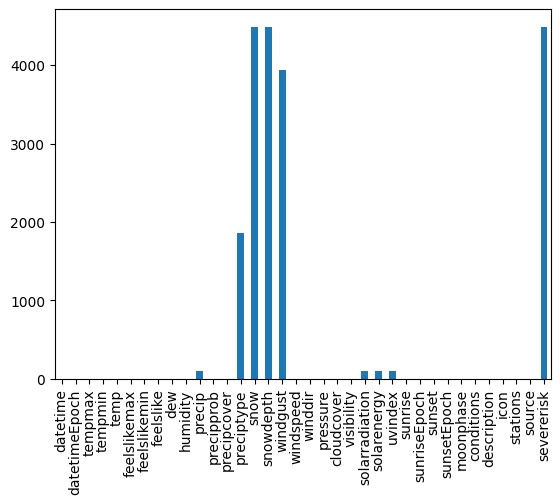

In [187]:
# Count the number of missing values for each column
missing_values_per_column = raw_data.isnull().sum()
missing_values_per_column.plot.bar()

# Convert to percentage
missing_values_per_column_percent = missing_values_per_column / raw_data.shape[0]

# define COL_MISSING_DROP_RATE in 'Define constants' rather than below.
#COL_MISSING_DROP_RATE =
q = "'"
for col, percent in missing_values_per_column_percent.items():
    if percent >= COL_MISSING_DROP_RATE:
        print(f'Column {(q+col+q).ljust(12)} is missing {round(percent*100)}% of values.')

In [188]:
missing_values_per_column[missing_values_per_column > 0].sort_values(ascending=False)

snow              4488
snowdepth         4488
severerisk        4488
windgust          3935
preciptype        1861
precip              96
solarradiation      96
solarenergy         96
uvindex             96
pressure             1
dtype: int64

In [189]:
missing_values_per_column_percent[missing_values_per_column_percent > 0].sort_values(ascending=False)

snow             0.90
snowdepth        0.90
severerisk       0.90
windgust         0.79
preciptype       0.37
precip           0.02
solarradiation   0.02
solarenergy      0.02
uvindex          0.02
pressure         0.00
dtype: float64

In [190]:
# Storing the columns' names (for COPY + PASTE)
to_drop_col_name = [col for col, percent in missing_values_per_column_percent.items() if percent >= COL_MISSING_DROP_RATE]
to_drop_col_name

['preciptype', 'snow', 'snowdepth', 'windgust', 'severerisk']

## Conclusion 2
- **Duplicated Rows:** `No duplicated rows (0%)`

- **Missing Values:**
  - By rows:
    - Missing 0 values, there are 369 rows (7%).
    - Missing 1 values, there are 143 rows (3%).
    - Missing 3 values, there are 356 rows (7%).
    - Missing 4 values, there are 2611 rows (52%).
    - Missing 5 values, there are 1424 rows (28%).
    - Missing 6 values, there are 1 rows (0%).
    - Missing 9 values, there are 96 rows (2%).
    - `Rows with missing data: 5000 (100.0)%`

  - By columns:
    - `snow              4488 (89%)`
    - `snowdepth         4488 (89%)`
    - `severerisk        4488 (89%)`
    - `windgust          3935 (78%)`
    - `preciptype        1861 (37%)`
    - precip              96 (1%)
    - solarradiation      96 (1%)
    - solarenergy         96 (1%)
    - uvindex             96 (1%)
    - pressure             1 (0%)



## 3. Data Distribution Analysis

In [191]:
# Spliting the data into numeric and categorical
raw_data_numeric = raw_data.select_dtypes(include='number')
raw_data_categorical = raw_data.select_dtypes(exclude='number')

In [192]:
raw_data_numeric.head()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,severerisk
0,1253984400,87.90,73.50,78.90,100.90,73.50,82.50,76.50,93.00,NaN,...,5.60,NaN,NaN,NaN,20523.00,1254004923,63977.00,1254048377,0.27,NaN
1,1254070800,84.80,75.30,79.60,94.00,75.30,82.70,75.70,88.40,NaN,...,6.60,NaN,NaN,NaN,20520.00,1254091320,63939.00,1254134739,0.30,NaN
2,1254157200,84.50,77.10,80.50,93.50,77.10,84.60,76.20,87.00,NaN,...,6.60,NaN,NaN,NaN,20518.00,1254177718,63901.00,1254221101,0.34,NaN
3,1254243600,87.90,74.60,79.30,100.20,74.60,82.40,76.30,91.70,NaN,...,5.70,NaN,NaN,NaN,20516.00,1254264116,63864.00,1254307464,0.37,NaN
4,1254330000,89.70,75.30,80.90,100.50,75.30,85.40,76.30,87.20,NaN,...,6.60,NaN,NaN,NaN,20514.00,1254350514,63826.00,1254393826,0.40,NaN


In [193]:
raw_data_categorical.head()

,datetime,preciptype,conditions,description,icon,stations,source
0,2009-09-27,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs
1,2009-09-28,NaN,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs
2,2009-09-29,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs
3,2009-09-30,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs
4,2009-10-01,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs


### Numerical Data
- **Descriptive Statistics:**
  - Find min, max, median, mode, std.
  - Make a conclusion on skewness.

- **Outliers:**
  - Use box plot to find outliers.
  - Comment on the abnormality of outliers.

In [194]:
# Display summary statistics
summary_stats = raw_data_numeric.describe()

# Calculate mode separately, as it's not included in describe()
mode_values = raw_data_numeric.mode().iloc[0]

# Convert mode values to a DataFrame and transpose it
mode_df = pd.DataFrame(mode_values).transpose()

# Concatenate summary statistics and mode values
summary_stats = pd.concat([summary_stats, mode_df]).rename(index={mode_df.index[0]: 'mode'})

# Display the results
summary_stats

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,severerisk
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,4904.00,...,5000.00,4904.00,4904.00,4904.00,5000.00,5000.00,5000.00,5000.00,5000.00,512.00
mean,1469941200.00,91.04,76.15,82.35,99.92,76.94,87.19,73.73,77.21,0.18,...,6.06,205.42,17.74,7.20,20974.71,1469962174.71,64603.81,1470005803.81,0.48,27.92
std,124720128.29,3.28,3.22,2.66,5.71,4.95,5.23,3.84,9.36,0.43,...,1.17,59.92,5.18,2.02,884.76,124720122.73,1006.39,124720155.46,0.29,18.73
min,1253984400.00,73.60,44.50,71.70,73.60,41.20,71.70,54.10,49.50,0.00,...,3.20,15.00,1.30,1.00,19777.00,1254004923.00,62796.00,1254048377.00,0.00,10.00
25%,1361962800.00,89.60,74.38,80.70,96.40,74.38,83.57,71.80,70.80,0.00,...,5.80,155.97,13.50,6.00,20388.00,1361984913.00,63715.75,1362027789.25,0.25,10.00
50%,1469941200.00,91.40,76.90,82.40,100.30,76.90,86.80,74.80,77.90,0.02,...,6.10,204.70,17.70,7.00,20608.00,1469961702.50,64989.50,1470007036.50,0.48,30.00
75%,1577919600.00,93.20,78.70,84.10,103.90,78.70,90.40,76.50,84.30,0.16,...,6.40,255.40,22.00,9.00,21733.00,1577941906.75,65337.00,1577983332.25,0.75,30.00
max,1685898000.00,100.50,85.90,90.50,119.70,100.30,106.90,81.40,99.80,8.95,...,47.60,324.20,28.00,10.00,22618.00,1685917794.00,66006.00,1685963609.00,0.98,75.00
mode,1253984400.00,91.40,75.20,83.10,105.10,75.20,85.70,76.60,73.70,0.00,...,6.50,173.00,21.50,9.00,20612.00,1254004923.00,65044.00,1254048377.00,0.25,10.00


In [195]:
# Calculate skewness based on mean and median
skewness = (summary_stats.loc['mean'] - summary_stats.loc['50%']).apply(lambda x: 'Right-skewed' if x > 0 else 'Left-skewed' if x < 0 else 'Symmetric')

# Display the skewness conclusion
skewness

datetimeEpoch        Symmetric
tempmax            Left-skewed
tempmin            Left-skewed
temp               Left-skewed
feelslikemax       Left-skewed
feelslikemin      Right-skewed
feelslike         Right-skewed
dew                Left-skewed
humidity           Left-skewed
precip            Right-skewed
precipprob         Left-skewed
precipcover       Right-skewed
snow                 Symmetric
snowdepth            Symmetric
windgust          Right-skewed
windspeed         Right-skewed
winddir           Right-skewed
pressure          Right-skewed
cloudcover        Right-skewed
visibility         Left-skewed
solarradiation    Right-skewed
solarenergy       Right-skewed
uvindex           Right-skewed
sunrise           Right-skewed
sunriseEpoch      Right-skewed
sunset             Left-skewed
sunsetEpoch        Left-skewed
moonphase         Right-skewed
severerisk         Left-skewed
dtype: object

array([[<Axes: title={'center': 'datetimeEpoch'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslikemax'}>],
       [<Axes: title={'center': 'feelslikemin'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'precipcover'}>,
        <Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'snowdepth'}>,
        <Axes: title={'center': 'windgust'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'solarradiation'}>,
        <Axes: ti

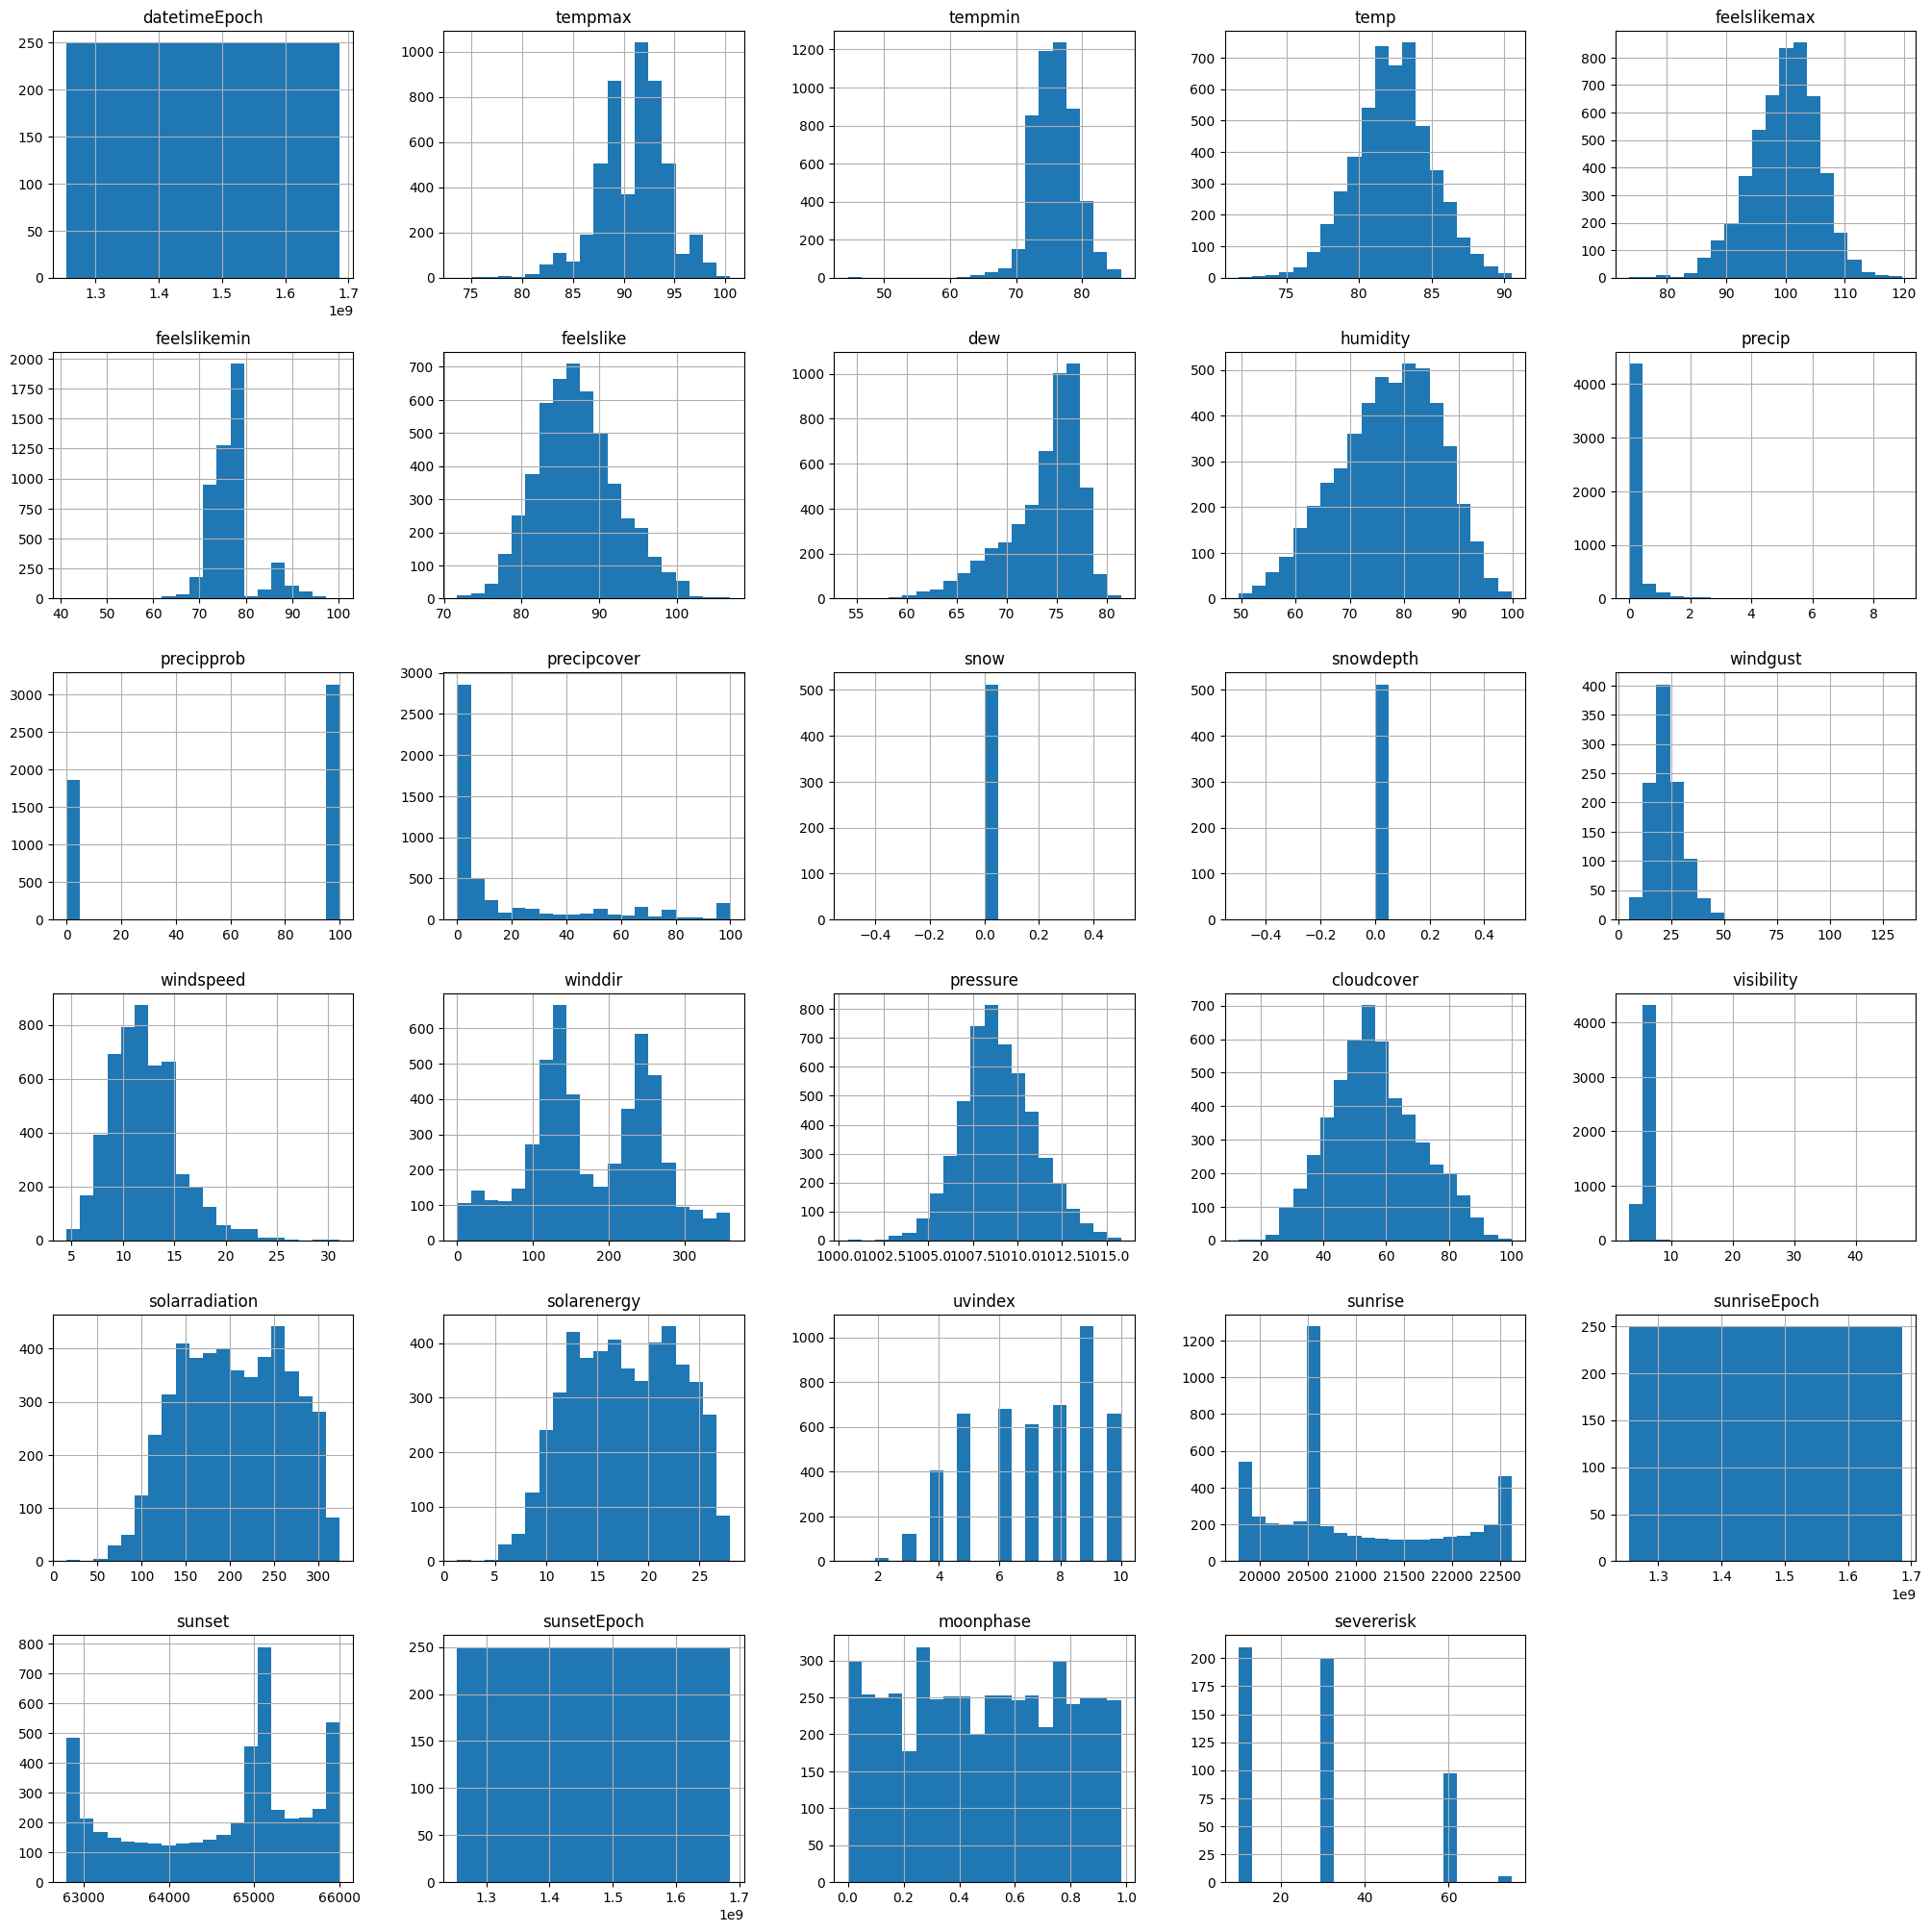

In [196]:
# Visualize histograms for further understanding
raw_data_numeric.hist(bins=20, figsize=(25, 25))

In [197]:
raw_data_numeric.columns

Index(['datetimeEpoch', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'pressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
       'uvindex', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase', 'severerisk'],
      dtype='object')

### Categorical Data
- **Distribution Analysis:**
  - Analyze the distribution of categorical data.

preciptype
['rain']    3139
Name: count, dtype: int64


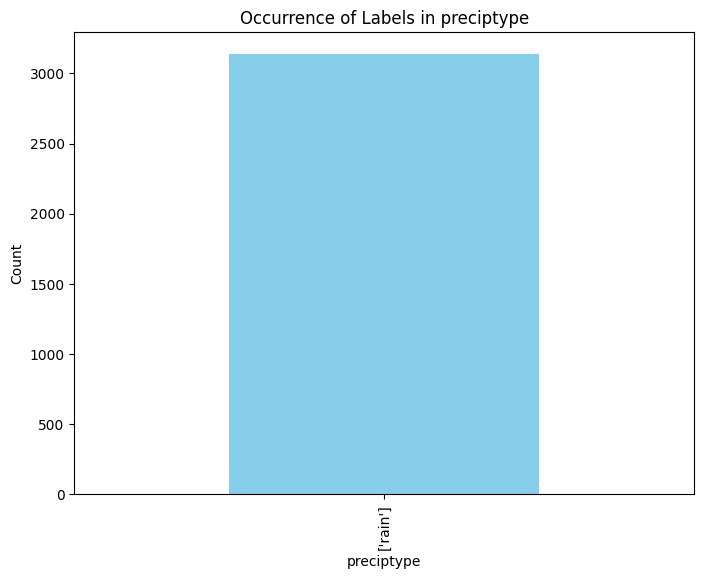

conditions
Rain, Partially cloudy    3103
Partially cloudy          1863
Rain, Overcast              31
Clear                        2
Overcast                     1
Name: count, dtype: int64


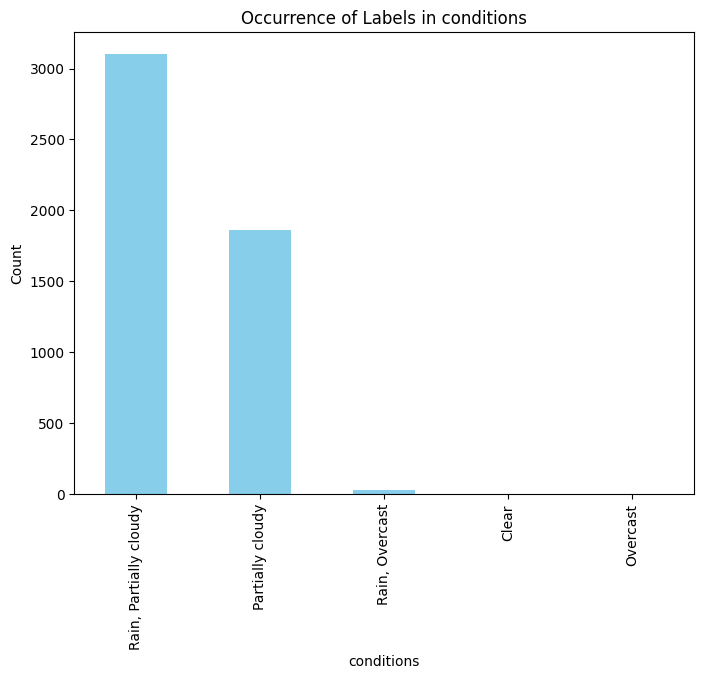

description
Partly cloudy throughout the day.                                             1765
Partly cloudy throughout the day with a chance of rain throughout the day.     905
Partly cloudy throughout the day with rain.                                    771
Partly cloudy throughout the day with late afternoon rain.                     680
Partly cloudy throughout the day with early morning rain.                      269
Partly cloudy throughout the day with afternoon rain.                          190
Partly cloudy throughout the day with rain in the morning and afternoon.       125
Partly cloudy throughout the day with morning rain.                             82
Becoming cloudy in the afternoon.                                               73
Partly cloudy throughout the day with rain clearing later.                      60
Clearing in the afternoon.                                                      25
Cloudy skies throughout the day with a chance of rain throughout the day.  

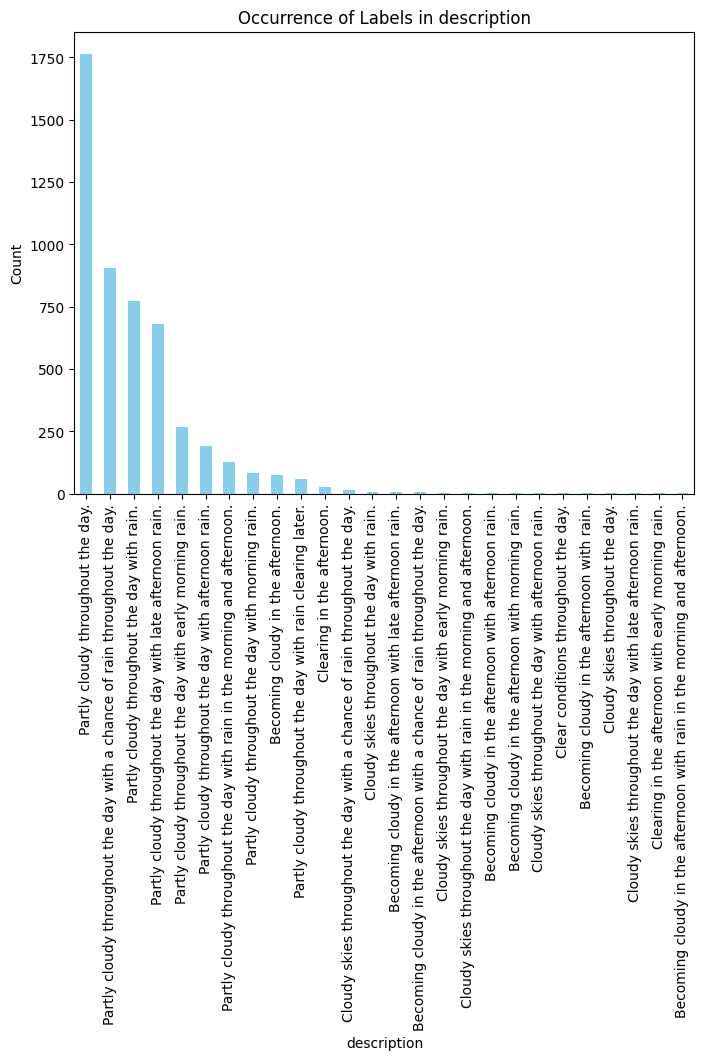

icon
rain                 3134
partly-cloudy-day    1863
clear-day               2
cloudy                  1
Name: count, dtype: int64


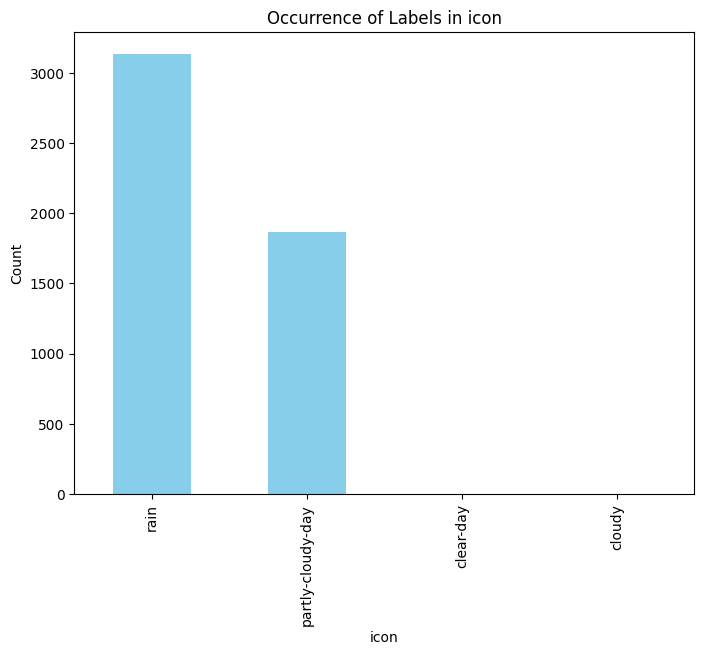

stations
['48894099999', '48900099999', 'VVTS']              3441
['48900099999', 'VVTS']                              876
['48900099999', 'VVTS', 'remote']                    418
['48894099999', '48900099999', 'VVTS', 'remote']     156
['48900099999']                                       96
['48894099999', 'remote']                              4
['48894099999', '48900099999', 'remote']               3
['48894099999', '48900099999']                         2
['48900099999', '48904099999', 'VVTS']                 1
['VVTS']                                               1
['48894099999', 'VVTS']                                1
['48894099999', 'VVTS', 'remote']                      1
Name: count, dtype: int64


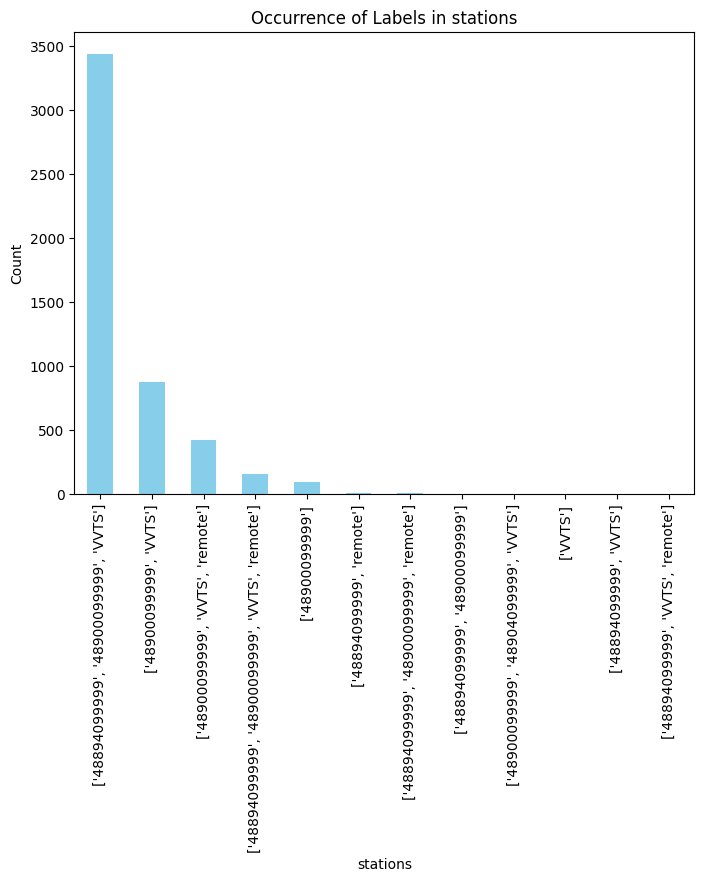

source
obs    5000
Name: count, dtype: int64


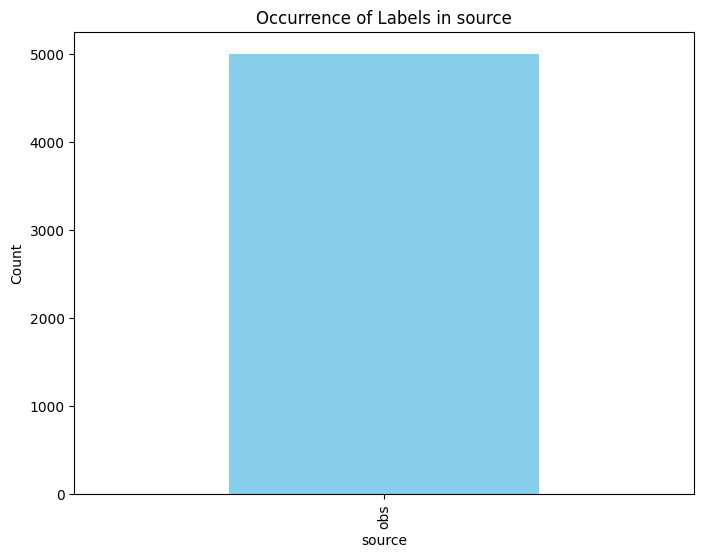

In [198]:
# Plot column chart for each categorical column
for column in raw_data_categorical.columns:
    if column in ['datetime']:
        continue
    
    value_counts = raw_data_categorical[column].value_counts()
    print(value_counts)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color='skyblue')
    
    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Occurrence of Labels in {column}')
    
    # Show the plot
    plt.show()

## Abnormal data and Outliers

In [199]:
summary_stats.loc[['min', 'max', '50%']].T.apply(round)

,min,max,50%
datetimeEpoch,1253984400.00,1685898000.00,1469941200.00
tempmax,74.00,100.00,91.00
tempmin,44.00,86.00,77.00
temp,72.00,90.00,82.00
feelslikemax,74.00,120.00,100.00
feelslikemin,41.00,100.00,77.00
feelslike,72.00,107.00,87.00
dew,54.00,81.00,75.00
humidity,50.00,100.00,78.00
precip,0.00,9.00,0.00


### Abnormal data
- temperature: the `tempmin` of 44.5F (6.9C) is strange. It should be [89.1F (14.4C)](https://tuoitrenews.vn/news/society/20210114/southern-vietnam-records-lowest-temperature-in-over-40-years/58779.html).
- `visibility` of 48 miles (77.25 km) is not normal because usually it is around 6 miles (~10km)
- `precip` has many outliers. It is normal because Ho Chi Minh has 2 seperate seasons (rain and dry).
- `windgust` has many outliers. It is normal because the storms hit Ho Chi Minh a few times each year.

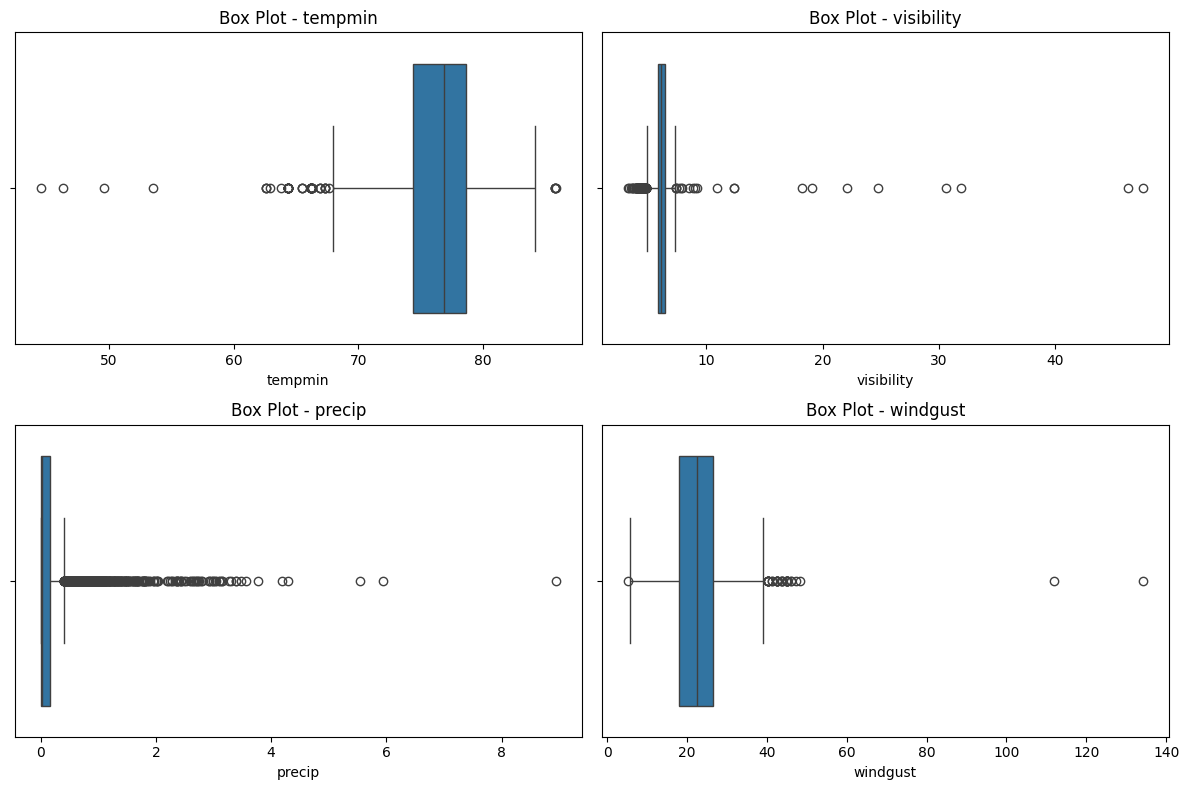

In [200]:
# Select four columns for the box plot
columns_to_plot = ['tempmin', 'visibility', 'precip', 'windgust']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the 2D array of axes to 1D
axes = axes.flatten()

# Create a box plot for each selected column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=raw_data_numeric[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

## Conclusion 3
### Numerical Data
- **Skewness**:
    - Symmetric: 'datetimeEpoch', 'snow', 'snowdepth'.
    - Left-skewed: 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'dew', 'humidity', 'precipprob', 'visibility', 'sunset', 'sunsetEpoch', 'severerisk'.
    - Right-skewed: 'feelslikemin', 'feelslike', 'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunriseEpoch', 'moonphase'.
- **Distribution**:
  - `Normal`: 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir' (2 mode), 'pressure', 'cloudcover'.
  - `Even`: 'datetimeEpoch', 'sunriseEpoch', 'sunsetEpoch'
  - `Other`: 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase', 'severerisk'.

- **Abnormal data and Outliers:**
  - temperature: the `tempmin` of 44.5F (6.9C) is strange. It should be [89.1F (14.4C)](https://tuoitrenews.vn/news/society/20210114/southern-vietnam-records-lowest-temperature-in-over-40-years/58779.html).
  - `visibility` of 48 miles (77.25 km) is not normal because usually it is around 6 miles (~10km)
  - `precip` has many outliers. It is normal because Ho Chi Minh has 2 seperate seasons (rain and dry).
  - `windgust` has many outliers. It is normal because the storms hit Ho Chi Minh a few times each year.
 
### Categorical Data
- **Distribution of value count:**
  - `'datetime'`: it is a time series so every values appear once.
  - `'preciptype'`: only one label 'rain' with 3139 occurences (62%)
  - `'conditions'`: 
    - Rain, Partially cloudy    3103 (62%)
    - Partially cloudy          1863 (37%)
    - Rain, Overcast              31 (0.6%)
    - Clear                        2 (~0%)
    - Overcast                     1 (~0%)
  - `'description'`: The quantity of labels is uneven, with some labels appearing very frequently, while others appear very rarely. The top 4 labels that appear most frequently account for 82.42% of the total data.
  - `'icon'`: The two labels that appear most frequently are rain (3134: 62%) and partly-cloudy-day (1863: 37%). The remaining two labels, clear-day(2: 0%) and cloudy(1: 0%), hardly appear at all.
  - `'stations'`: one label obs with 5000 occurences (100%).


## 4. Correlation Analysis
- **Correlation Visualization:** Use a heatmap to visualize the correlation between each feature.

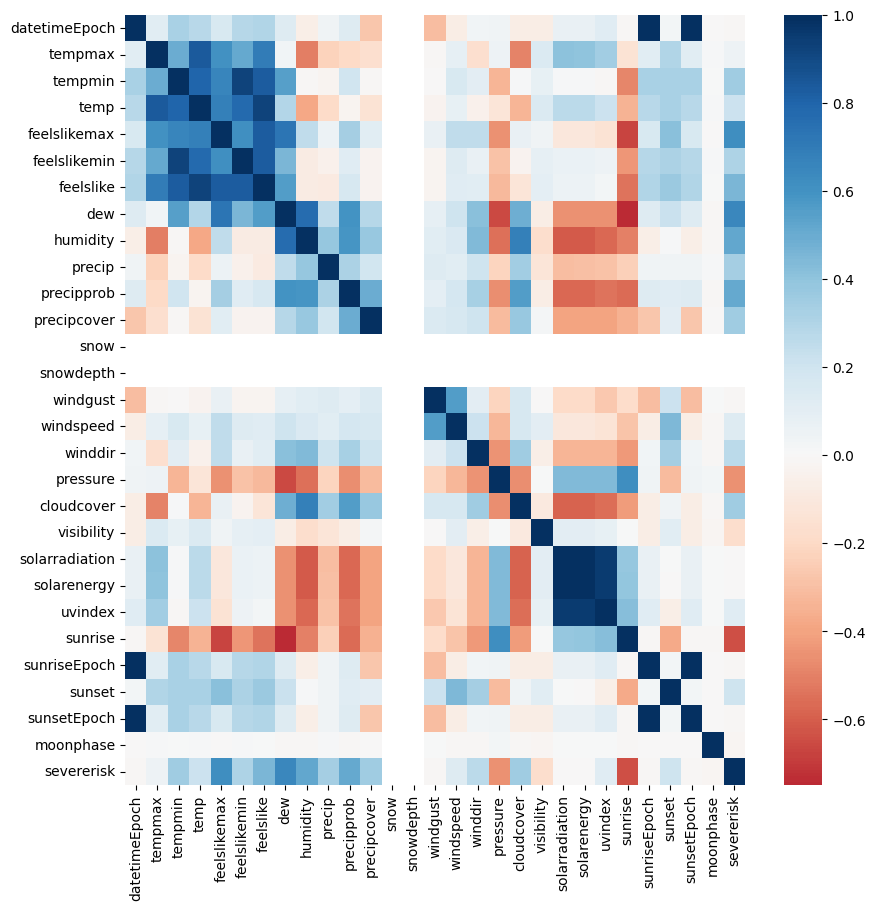

In [201]:
# plot a correlation matrix
def cor_matrix(df: pd.DataFrame, size:tuple =(10,10)):
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(df.corr(), cmap='RdBu', center=0,ax=ax)
    plt.show()
    
cor_matrix(raw_data_numeric)

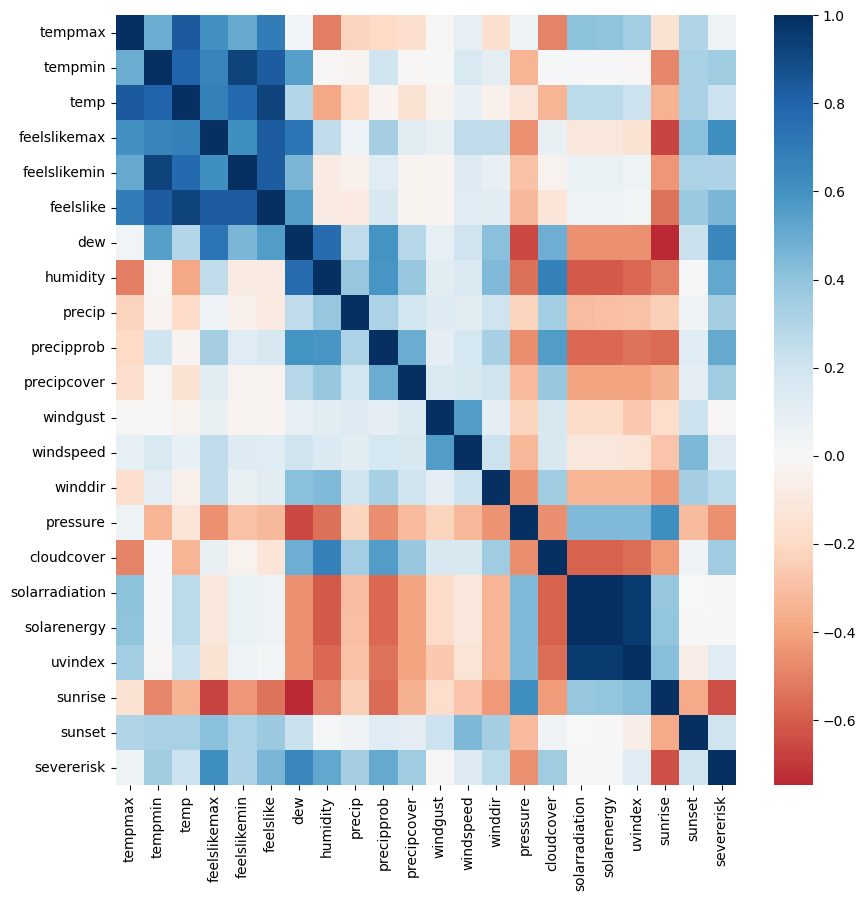

In [202]:
# Drop irrelevant columns (coef ~0)
cor_matrix(raw_data_numeric.drop(columns=['snow', 'snowdepth', 'moonphase', 'visibility', 'datetimeEpoch', 'sunriseEpoch', 'sunsetEpoch']))

## Conclusion 4
Useful infomation:
- `'pressure'` and `'sunrise'` has `medium positive correlation` with each other. They both have similar correlation with the other features. `Strong negative` with `temperature` ('tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike'), `'dew'` and `'severerisk'`. `Medium-low negative` with `'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed' and 'winddir'.
- `'sunset'` is nearly `opposite` with `'sunrise'` in term of corelation with other features.
- ('solarradiation', 'solarenergy', 'uvindex', 'sunrise') has negative correlation with ()
- `('solarradiation', 'solarenergy', 'uvindex', 'sunrise')` has `medium negative` correlation with `('dew', 'humidity', 'precip', 'precipprob', 'precipcover')`
- Each element in `('dew', 'humidity', 'precip', 'precipprob', 'precipcover')` has 'positve' correlation with each features in the same group.

## 5. Final Conclusion and Comments
- **Comments:**
  - Provide clear and concise comments on each result.
  - Ensure proper use of markdown for clarity.

## From Conclusion 1
- **Rows and Columns:** This data has 5000 rows and 36 columns.

- **Meaning of Each Row/Column:** see [above](#location)

- **Datatypes:** Features with unsuitable types: 'datetime', 'sunrise' and 'sunset'.

## From Conclusion 2
- **Duplicated Rows:** `No duplicated rows (0%)`

- **Missing Values:**
  - By rows:
    - Missing 4 values, there are 2611 rows (52%).
    - Missing 5 values, there are 1424 rows (28%).
    - `Rows with missing data: 5000 (100.0)%`

  - By columns:
    - `snow              4488 (89%)`
    - `snowdepth         4488 (89%)`
    - `severerisk        4488 (89%)`
    - `windgust          3935 (78%)`
    - `preciptype        1861 (37%)`

## From Conclusion 3
### Numerical Data
- **Skewness**: The data is mostly skewed. `Normalization and Standardization are needed`.

- **Abnormal data and Outliers:**
  - temperature: the `tempmin` should be set a minimum of 89.1F (14.4C)
  - `visibility`should be set a minimun around its median - 6 miles (~10km)
  - `precip` has many outliers. It is normal because Ho Chi Minh has 2 seperate seasons (rain and dry).
  - `windgust` has many outliers. It is normal because the storms hit Ho Chi Minh a few times each year.
 
### Categorical Data
- **Distribution of value count** is significantly imbalance between labels.

## From Conclusion 4
- `'pressure'` and `'sunrise'` has `medium positive correlation` with each other. They both have similar correlation with the other features. `Strong negative` with `temperature` ('tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike'), `'dew'` and `'severerisk'`. `Medium-low negative` with `'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed' and 'winddir'.
- `'sunset'` is nearly `opposite` with `'sunrise'` in term of corelation with other features.
- ('solarradiation', 'solarenergy', 'uvindex', 'sunrise') has negative correlation with ()
- `('solarradiation', 'solarenergy', 'uvindex', 'sunrise')` has `medium negative` correlation with `('dew', 'humidity', 'precip', 'precipprob', 'precipcover')`
- Each element in `('dew', 'humidity', 'precip', 'precipprob', 'precipcover')` has 'positve' correlation with each features in the same group.

--- 
# TO BE DELETED
## Incorrect Data Check
Checking each columnn value if it satisfied the column criteria. <br>
Define a CRITERIA `dictionary` of the following format:

{<br>
    **'column 1'**: `[criteria 1]`<br>
    **'column 2'**: `[criteria 2]`<br>
    ... <br>
    **'column n'**: `[criteria n]`<br>
}

**'column 1', 'column 2',...,'column n'** are the columns names (string).<br>
`[criteria 1], [criteria 2],...,[criteria n]` are the criterias (list).<br>

The `criteria`s are depend on the column's data type:
- Numeric: checking if a value is in [min, max]
    - criteria[0]: numeric data type
    - criteria[1]: min
    - criteria[2]: max
    - Example: {'temp': [float, 0, 100]}
- Categorical:
    - criteria[0]: str
    - Example: {'country': [str]}

In [203]:
MIN_F = -459.67     # 0 Kelvin to Fahrenheit
MAX_F = 134 + 10    # according to https://wmo.asu.edu/content/world-highest-temperature

MIN_WIND_SPEED = 0      # miles/hour
MAX_WIN_SPEED = 1000    # miles/hour

# Percentage scale 0-100
MIN_PERCENT_100 = 0
MAX_PERCENT_100 = 100

# Percentage scale 0-1
MIN_PERCENT_1 = 0
MAX_PERCENT_1 = 1

CRITERIA = {'datetime':         ['str'],
            'datetimeEpoch':    ['int'],
            'tempmax':          ['float', MIN_F, MAX_F], 
            'tempmin':          ['float', MIN_F, MAX_F],
            'temp':             ['float', MIN_F, MAX_F],
            'feelslikemax':     ['float', MIN_F, MAX_F], 
            'feelslikemin':     ['float', MIN_F, MAX_F], 
            'feelslike':        ['float', MIN_F, MAX_F], 
            'dew':              ['float', MIN_PERCENT_100, MAX_PERCENT_100], 
            'humidity':         ['float', MIN_PERCENT_100, MAX_PERCENT_100],
            'precip':           ['float'],
            'precipprob':       ['float', MIN_PERCENT_100, MAX_PERCENT_100], 
            'precipcover':      ['float', MIN_PERCENT_100, MAX_PERCENT_100], 
            'preciptype':       ['str'], 
            'snow':             ['float'],
            'snowdepth':        ['float'],
            'windgust':         ['float'], 
            'windspeed':        ['float'], 
            'winddir':          ['float', 0, 360], 
            'pressure':         ['float'],
            'cloudcover':       ['float', MIN_PERCENT_100, MAX_PERCENT_100],
            'visibility':       ['float'],
            'solarradiation':   ['float'], 
            'solarenergy':      ['float'], 
            'uvindex':          ['int', 0, 10],
            'sunrise':          ['str'],
            'sunriseEpoch':     ['int'], 
            'sunset':           ['str'], 
            'sunsetEpoch':      ['int'], 
            'moonphase':        ['float', MIN_PERCENT_1, MAX_PERCENT_1],
            'conditions':       ['str'],
            'description':      ['str'], 
            'icon':             ['str'], 
            'stations':         ['str'], 
            'source':           ['str'], 
            'severerisk':       ['str']}

def checking_criteria(data: pd.DataFrame, criteria: dict) -> tuple:
    dtype = {'int': [pd.Int64Dtype],
             'float': [pd.Float64Dtype],
             'str': [pd.object]}
    
    for i, (col, crit) in enumerate(zip(data.columns, criteria)):
        for j, row in enumerate(col):
            if data.iloc[col, j]:
                pass